<h1 align="center">Análisis preliminar: Aportes campañas políticas</h1>
<h4 align="center">by Wladimir Ormazábal</h4>

A continuación, a modo de prueba de concepto, se analizan los datos de los montos de los aportes a las campañas de las elecciones presidenciales.

## Origen de datos

Se trabajaron con datos públicos de SERVEL, especificamente:

* [Ingresos Presidencial y Parlamentarias 2017. Actualizados al 14 de septiembre de 2018](https://www.servel.cl/wp-content/uploads/2018/10/Ingresos_Presidencial_y_Parlamentarias_2017._Actualizado_al_14_de_septiembre_de_2018.xlsx)

Se realizaron algunas modificaciones al documento original:
* Se cambio su formato a CSV.
* Se eliminaron algunas columnas.
* Se modifico la codificación a UTF-8
* Se trabajo solo con los datos de la hoja 'Planilla Ingresos Final'

In [316]:

import pandas as pd
import numpy as np

#CARGAR LOS DATOS DESDE EL EXCEL
aporte_candidaturas = pd.read_csv('data/elecciones_aportes_2.csv')

#MODIFICACION DE LOS RUT DE LOS APORTANTES Y CANDIDATOS
#concatenar los rut aportantes
nparray = aporte_candidaturas['APORTANTE'] +"-"+aporte_candidaturas['DV']
aportantes  = pd.Series(nparray)
del aporte_candidaturas['APORTANTE']
del aporte_candidaturas['DV']
aporte_candidaturas = pd.concat([aporte_candidaturas, aportantes.rename("APORTANTE")], axis=1)
#concatenar rut candidato
nparray = aporte_candidaturas['RUN CANDIDATO'] +"-"+aporte_candidaturas['DV CANDIDATO']
candidato  = pd.Series(nparray)
del aporte_candidaturas['RUN CANDIDATO']
del aporte_candidaturas['DV CANDIDATO']
aporte_candidaturas = pd.concat([aporte_candidaturas, candidato.rename("RUN CANDIDATO")], axis=1)

#GENERACION DE LISTAS CON LOS VALORES PARAMETRICOS RELEVANTES
tipo_eleccion = pd.Series(aporte_candidaturas['ELECCION'].unique())
tipo_territorio = pd.Series(aporte_candidaturas['TERRITORIO ELECTORAL'].unique())
candidatos = pd.Series(aporte_candidaturas['NOMBRE DEL CANDIDATO'].unique())
tipo_afiliacion = pd.Series(aporte_candidaturas['AFILIACION'].unique())
partido = pd.Series(aporte_candidaturas['NOMBRE PARTIDO'].unique())
tipo_region = pd.Series(aporte_candidaturas['REGION'].unique())
tipo_cuenta = pd.Series(aporte_candidaturas['TIPO CUENTA'].unique())
aportantes_by_rut = pd.Series(aporte_candidaturas['APORTANTE'].unique())
candidatos_presidenciales = pd.Series(aporte_candidaturas.loc[aporte_candidaturas['ELECCION']=='PRESIDENTE']['NOMBRE DEL CANDIDATO'].unique())

aporte_candidaturas_original = aporte_candidaturas

aporte_candidaturas.head()


,ELECCION,REGION,TERRITORIO ELECTORAL,NOMBRE DEL CANDIDATO,AFILIACION,NOMBRE PARTIDO,TIPO CUENTA,MONTO,APORTANTE,RUN CANDIDATO
0,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,20000000,8.510.034-3,8.510.034-3
1,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,6000000,8.510.034-3,8.510.034-3
2,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,20000000,8.510.034-3,8.510.034-3
3,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,135,6000000,15.216.914-0,8.510.034-3
4,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,10000000,8.510.034-3,8.510.034-3


In [317]:
#ALGUNAS FUNCIONES QUE SIRVEN PARA VER LA NATURALEZA DE LA DISTRIBUCION DE ALGUNOS DATOS

#1 valores estadisticos
def show_stadistical_values(lista, printval = False):
    import pandas as pd
    import numpy as np
    min_val = lista.min()
    max_val = lista.max()
    mean_val = lista.mean()
    med_val = lista.median()
    mod_val = lista.mode()[0]
    rng = lista.max() - lista.min()
    var = lista.var()
    std = lista.std()
    if printval:
        print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\nRange:{:.2f}\nVariance:{:.2f}\nStandard Deviation:{:.2f}'.format(min_val,
                                                                                                 mean_val,
                                                                                                 med_val,
                                                                                                 mod_val,
                                                                                                 max_val,
                                                                                                 rng,
                                                                                                 var,
                                                                                                 std))
    
    data = np.array([min_val,max_val,mean_val,med_val,mod_val,rng,var,std])
    return pd.Series(data,index=['min','max','mean','median','mode','rango','variance','standard_deviation']) 

#2 Distribucion de los valores: Graficar histograma y boxplot
#  y densidad, para ver todo la distribucion de la dimension seleccionada
def show_resume(var_data, bins = 0):
    from matplotlib import pyplot as plt

    var_values = show_stadistical_values(var_data)
    minlabel = 'Min ({:.2f})'.format(var_values['min'])
    meanlabel = 'Mean ({:.2f})'.format(var_values['mean'])
    medianlabel = 'Median ({:.2f})'.format(var_values['median'])
    modelabel = 'Mode ({:.2f})'.format(var_values['mode'])
    maxlabel = 'Max ({:.2f})'.format(var_values['max'])
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(3, 1, figsize = (18,10))

    # HISTOGRAMA
    if bins == 0:
        ax[0].hist(var_data)
    else:
        ax[0].hist(var_data,bins)
    ax[0].set_title('Histograma')
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=var_values['min'], color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=var_values['mean'], color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=var_values['median'], color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=var_values['mode'], color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=var_values['max'], color = 'black', linestyle='dashed', linewidth = 2)
    
    ax[0].legend(fontsize='medium', labels=[minlabel,meanlabel,medianlabel,modelabel,maxlabel], handlelength=2.0, loc = 'upper left')
    
    # BOXPLOT   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_ylabel('Value')
    ax[1].set_xlabel('Value')
    
    #densidad
    ax[2]=var_data.plot.density()

    # Show the mean, median, and mode
    ax[2].axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=var_values['min'], color = 'gray', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=var_values['max'], color = 'black', linestyle='dashed', linewidth = 2)
    ax[2].legend(fontsize='medium', labels=['Densidad',meanlabel,medianlabel,modelabel,minlabel,maxlabel], handlelength=2.0, loc = 'upper left')

    # Add a title to the Figure
    fig.suptitle('Data Resume')
    # Show the figure
    #fig.savefig('resumeejemplo.png')
    fig.show()
    
#3 DENSIDAD DE LOS VALORES
def show_density(var_data):
    from matplotlib import pyplot as plt

    var_values = show_stadistical_values(var_data)
    minlabel = 'Min ({:.2f})'.format(var_values['min'])
    meanlabel = 'Mean ({:.2f})'.format(var_values['mean'])
    medianlabel = 'Median ({:.2f})'.format(var_values['median'])
    modelabel = 'Mode ({:.2f})'.format(var_values['mode'])
    maxlabel = 'Max ({:.2f})'.format(var_values['max'])
    
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_values['min'], color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_values['max'], color = 'black', linestyle='dashed', linewidth = 2)
    plt.legend(fontsize='medium', labels=['Densidad',meanlabel,medianlabel,modelabel,minlabel,maxlabel], handlelength=2.0, loc = 'upper left')
    
    # Show the figure
    plt.show()

def show_boxplot(var_data):
    from matplotlib import pyplot as plt

    var_values = show_stadistical_values(var_data)
    minlabel = 'Min ({:.2f})'.format(var_values['min'])
    meanlabel = 'Mean ({:.2f})'.format(var_values['mean'])
    medianlabel = 'Median ({:.2f})'.format(var_values['median'])
    modelabel = 'Mode ({:.2f})'.format(var_values['mode'])
    maxlabel = 'Max ({:.2f})'.format(var_values['max'])
    
    fig = plt.figure(figsize=(10,4))
    plt.boxplot(var_data)
    plt.title('Data Distribution')
    plt.show()

def show_histogram(var_data, bins=0):
    from matplotlib import pyplot as plt

    var_values = show_stadistical_values(var_data)
    minlabel = 'Min ({:.2f})'.format(var_values['min'])
    meanlabel = 'Mean ({:.2f})'.format(var_values['mean'])
    medianlabel = 'Median ({:.2f})'.format(var_values['median'])
    modelabel = 'Mode ({:.2f})'.format(var_values['mode'])
    maxlabel = 'Max ({:.2f})'.format(var_values['max'])
    
    fig = plt.figure(figsize=(10,4))
    if bins==0:
        plt.hist(var_data)
    else:
        plt.hist(var_data,bins)
    plt.title('Histograma')
    plt.ylabel('Frequency')

    plt.axvline(x=var_values['min'], color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_values['mean'], color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_values['median'], color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_values['mode'], color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_values['max'], color = 'black', linestyle='dashed', linewidth = 2)
    
    plt.legend(fontsize='medium', labels=[minlabel,meanlabel,medianlabel,modelabel,maxlabel], handlelength=2.0, loc = 'upper left')
    plt.show()

In [318]:
show_stadistical_values(aporte_candidaturas['MONTO'], True)

Minimum:0.00
Mean:837542.02
Median:30000.00
Mode:10000.00
Maximum:1130000000.00
Range:1130000000.00
Variance:108021028676967.12
Standard Deviation:10393316.54


min                   0.000000e+00
max                   1.130000e+09
mean                  8.375420e+05
median                3.000000e+04
mode                  1.000000e+04
rango                 1.130000e+09
variance              1.080210e+14
standard_deviation    1.039332e+07
dtype: float64

In [319]:
aporte_candidaturas.loc[aporte_candidaturas['MONTO']<1000]

,ELECCION,REGION,TERRITORIO ELECTORAL,NOMBRE DEL CANDIDATO,AFILIACION,NOMBRE PARTIDO,TIPO CUENTA,MONTO,APORTANTE,RUN CANDIDATO
301,PRESIDENTE,NACIONAL,NACIONAL,CAROLINA GOIC BOROEVIC,Afiliado,PARTIDO DEMOCRATA CRISTIANO,125,11,NaN,8.124.187-2
549,PRESIDENTE,NACIONAL,NACIONAL,BEATRIZ SANCHEZ MUÑOZ,Candidatura Independiente,INDEPENDIENTE,125,500,NaN,9.306.620-0
789,PRESIDENTE,NACIONAL,NACIONAL,BEATRIZ SANCHEZ MUÑOZ,Candidatura Independiente,INDEPENDIENTE,135,900,17.716.434-8,9.306.620-0
987,PRESIDENTE,NACIONAL,NACIONAL,EDUARDO ANTONIO ARTES BRICHETTI,Afiliado,UNION PATRIOTICA,135,1,18.871.000-k,6.195.038-9
992,PRESIDENTE,NACIONAL,NACIONAL,EDUARDO ANTONIO ARTES BRICHETTI,Afiliado,UNION PATRIOTICA,135,1,18.117.049-2,6.195.038-9
...,...,...,...,...,...,...,...,...,...,...
42460,DIPUTADO,13,COLINA,GABRIEL SILBER ROMO,Afiliado,PARTIDO DEMOCRATA CRISTIANO,142,0,7.683.303-6,8.779.559-4
42616,DIPUTADO,13,COLINA,ALEJANDRA BRAVO HIDALGO,Afiliado,PARTIDO REGIONALISTA INDEPENDIENTE,110,997,NaN,10.089.116-6
42641,DIPUTADO,13,COLINA,SEBASTIAN KEITEL BIANCHI,Independiente en Pacto,INDEPENDIENTE,148,1,65.108.245-5,9.093.027-3
42722,DIPUTADO,13,PUENTE ALTO,ROBERTO OVALLE MOLINA,Afiliado,UNION PATRIOTICA,999,0,97.030.000-7,12.102.659-7


In [320]:
aporte_candidaturas = aporte_candidaturas.loc[aporte_candidaturas['MONTO']>= 1000]
show_stadistical_values(aporte_candidaturas['MONTO'], True)

Minimum:1000.00
Mean:843482.24
Median:30000.00
Mode:10000.00
Maximum:1130000000.00
Range:1129999000.00
Variance:108782212031821.50
Standard Deviation:10429871.14


min                   1.000000e+03
max                   1.130000e+09
mean                  8.434822e+05
median                3.000000e+04
mode                  1.000000e+04
rango                 1.129999e+09
variance              1.087822e+14
standard_deviation    1.042987e+07
dtype: float64

In [321]:
#MODIFICAR AFILIACION: la idea es que para DIPUTADO y SENADOR, el candidato recibe un aporte de algun partido la afiliacion queda como 'Independiente en Pacto', pero el partido se modifica al del aportante

#objetos del tipo partido
class PartidoPolitico:  
    def __init__(self, nombre,rut):  
        self.nombre = nombre
        self.rut = rut

partidos_politicos = []
partidos_politicos.append(PartidoPolitico('PARTIDO PAIS','53.325.352-0'))
partidos_politicos.append(PartidoPolitico('PARTIDO DEMOCRATA CRISTIANO','71.468.400-0'))
partidos_politicos.append(PartidoPolitico('UNION PATRIOTICA','65.120.872-6'))
partidos_politicos.append(PartidoPolitico('PARTIDO PROGRESISTA','65.031.591-k'))
partidos_politicos.append(PartidoPolitico('RENOVACION NACIONAL','71.395.000-9'))
partidos_politicos.append(PartidoPolitico('UNION DEMOCRATA INDEPENDIENTE','71.552.600-k'))
partidos_politicos.append(PartidoPolitico('PARTIDO HUMANISTA','71.447.800-1'))
partidos_politicos.append(PartidoPolitico('PODER','65.114.322-5'))
partidos_politicos.append(PartidoPolitico('PARTIDO LIBERAL DE CHILE','65.114.727-1'))
partidos_politicos.append(PartidoPolitico('PARTIDO POR LA DEMOCRACIA','71.455.400-k'))
partidos_politicos.append(PartidoPolitico('PARTIDO COMUNISTA DE CHILE','71.701.800-1'))
partidos_politicos.append(PartidoPolitico('FEDERACION REGIONALISTA VERDE SOCIAL','65.144.125-0'))
partidos_politicos.append(PartidoPolitico('PARTIDO RADICAL SOCIALDEMOCRATA','72.551.500-6'))
partidos_politicos.append(PartidoPolitico('PARTIDO SOCIALISTA DE CHILE','71.706.400-3'))
partidos_politicos.append(PartidoPolitico('AMPLITUD','65.107.248-4'))
partidos_politicos.append(PartidoPolitico('PARTIDO IGUALDAD','65.036.256-k'))
partidos_politicos.append(PartidoPolitico('REVOLUCION DEMOCRATICA','65.123.086-1'))
partidos_politicos.append(PartidoPolitico('PARTIDO CIUDADANOS','65.125.739-5'))
partidos_politicos.append(PartidoPolitico('PARTIDO EVOLUCION POLITICA','65.108.245-5'))
partidos_politicos.append(PartidoPolitico('DEMOCRACIA REGIONAL PATAGONICA','65.112.171-k'))
partidos_politicos.append(PartidoPolitico('TODOS','65.111.743-7'))
partidos_politicos.append(PartidoPolitico('PARTIDO REGIONALISTA INDEPENDIENTE','65.114.239-3'))
partidos_politicos.append(PartidoPolitico('PARTIDO DE TRABAJADORES REVOLUCIONARIOS','65.150.227-6'))
partidos_politicos.append(PartidoPolitico('PARTIDO MAS REGION','65.102.519-2'))
partidos_politicos.append(PartidoPolitico('PARTIDO ECOLOGISTA VERDE','65.037.533-5'))
partidos_politicos.append(PartidoPolitico('PARTIDO IZQUIERDA CIUDADANA DE CHILE','65.119.848-8'))

#se recorre y se almacena en caso de coincidencia el partido de financiamiento
class Afiliacion:  
    def __init__(self, afiliacion,rut):  
        self.afiliacion = afiliacion
        self.rut = rut
nueva_afiliacion = []

rut_candidatos_objetivo = pd.Series(aporte_candidaturas.loc[((aporte_candidaturas['ELECCION']=='SENADOR') | (aporte_candidaturas['ELECCION']=='DIPUTADO')) & (aporte_candidaturas['AFILIACION']=='Independiente en Pacto')]['RUN CANDIDATO'].unique())

for r in rut_candidatos_objetivo:
    for p in partidos_politicos:
        if aporte_candidaturas.loc[((aporte_candidaturas['ELECCION']=='SENADOR') | (aporte_candidaturas['ELECCION']=='DIPUTADO')) & (aporte_candidaturas['AFILIACION']=='Independiente en Pacto') & (aporte_candidaturas['APORTANTE'] == p.rut) & (aporte_candidaturas['RUN CANDIDATO'] == r)]['MONTO'].sum() > 0:
            nueva_afiliacion.append(Afiliacion(p.nombre,r))

#for r in nueva_afiliacion:
#    print('{} - {}'.format(r.rut,r.afiliacion))

for r in nueva_afiliacion:
    for index in aporte_candidaturas.loc[aporte_candidaturas['RUN CANDIDATO'] == r.rut]['NOMBRE PARTIDO'].index:
        aporte_candidaturas.loc[index,'NOMBRE PARTIDO']=r.afiliacion

aporte_candidaturas.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,ELECCION,REGION,TERRITORIO ELECTORAL,NOMBRE DEL CANDIDATO,AFILIACION,NOMBRE PARTIDO,TIPO CUENTA,MONTO,APORTANTE,RUN CANDIDATO
0,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,20000000,8.510.034-3,8.510.034-3
1,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,6000000,8.510.034-3,8.510.034-3
2,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,20000000,8.510.034-3,8.510.034-3
3,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,135,6000000,15.216.914-0,8.510.034-3
4,PRESIDENTE,NACIONAL,NACIONAL,ALEJANDRO NAVARRO BRAIN,Afiliado,PARTIDO PAIS,110,10000000,8.510.034-3,8.510.034-3


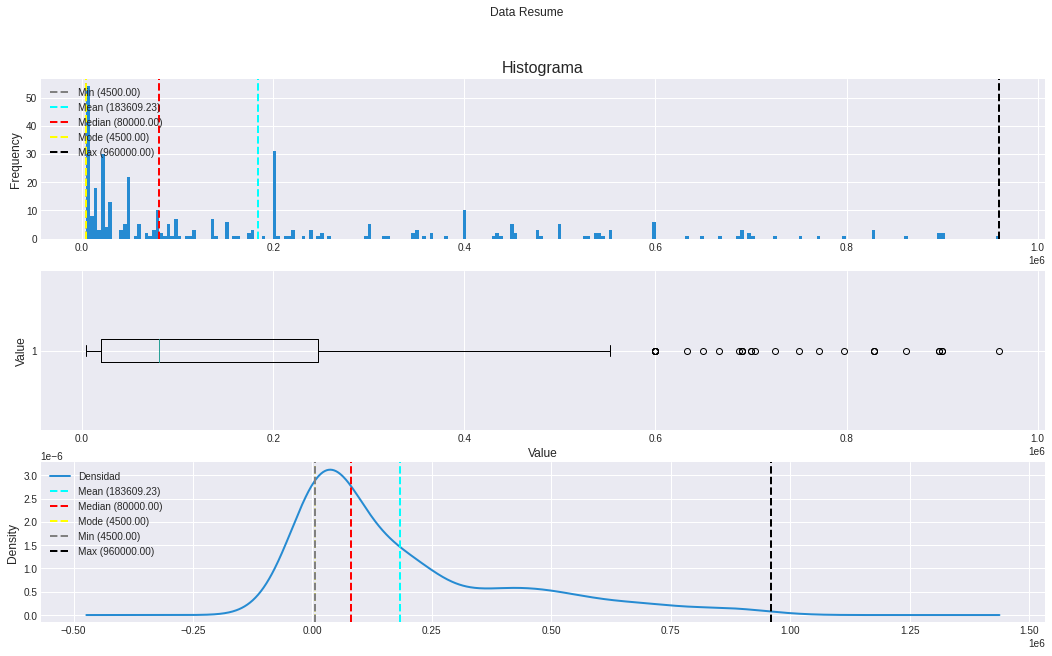

In [322]:
show_resume(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE PARTIDO']=='PARTIDO PAIS')&(aporte_candidaturas['ELECCION']=='DIPUTADO')& (aporte_candidaturas['MONTO'] < 1000000)]['MONTO'],250)

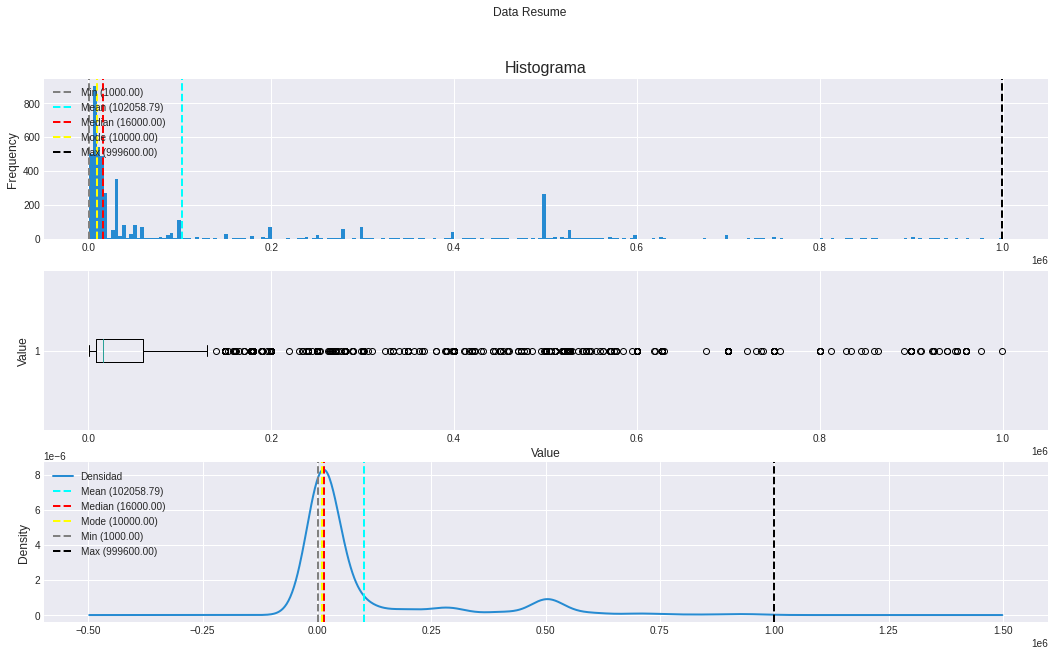

In [323]:
show_resume(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE PARTIDO']=='UNION DEMOCRATA INDEPENDIENTE')&(aporte_candidaturas['ELECCION']=='DIPUTADO') & (aporte_candidaturas['MONTO'] < 1000000)]['MONTO'],250)

In [324]:
#agrupando por partido y por monto, segun elecciones
aporte_candidaturas.loc[(aporte_candidaturas['ELECCION']=='DIPUTADO') & (aporte_candidaturas['TIPO CUENTA']==135)]['MONTO'].sum()

#portipo de eleccion
montos_tipo_eleccion = []
for e in tipo_eleccion:
    montos_tipo_eleccion.append(aporte_candidaturas.loc[aporte_candidaturas['ELECCION']==e]['MONTO'].sum())

resumen_tipo_eleccion = np.array([tipo_eleccion, montos_tipo_eleccion])

#montos por partido todo tipo de eleccion
montos_partido = []
for e in partido:
    montos_partido.append(aporte_candidaturas.loc[aporte_candidaturas['NOMBRE PARTIDO']==e]['MONTO'].sum())

resumen_partido = np.array([partido, montos_partido])

#montos por partido presidencial
montos_partido_presidencial = []
for e in partido:
    montos_partido_presidencial.append(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE PARTIDO']==e)&(aporte_candidaturas['ELECCION']=='PRESIDENTE')]['MONTO'].sum())

resumen_partido_presidencial = np.array([partido, montos_partido_presidencial])

#montos por candidato presidencial
montos_candidato_presidencial = []
for e in candidatos_presidenciales:
    montos_candidato_presidencial.append(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE DEL CANDIDATO']==e)&(aporte_candidaturas['ELECCION']=='PRESIDENTE')]['MONTO'].sum())

resumen_candidato_presidencial = np.array([candidatos_presidenciales, montos_candidato_presidencial])

#montos por partido diputado
montos_partido_diputado = []
for e in partido:
    montos_partido_diputado.append(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE PARTIDO']==e)&(aporte_candidaturas['ELECCION']=='DIPUTADO')]['MONTO'].sum())
resumen_partido_diputado = np.array([partido, montos_partido_diputado])

montos_partido_diputado_original = []
for e in partido:
    montos_partido_diputado_original.append(aporte_candidaturas_original.loc[(aporte_candidaturas_original['NOMBRE PARTIDO']==e)&(aporte_candidaturas_original['ELECCION']=='DIPUTADO')]['MONTO'].sum())
resumen_partido_diputado_original = np.array([partido, montos_partido_diputado_original])

montos_partido_senador = []
for e in partido:
    montos_partido_senador.append(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE PARTIDO']==e)&(aporte_candidaturas['ELECCION']=='SENADOR')]['MONTO'].sum())
resumen_partido_senador = np.array([partido, montos_partido_senador])

montos_partido_senador_original = []
for e in partido:
    montos_partido_senador_original.append(aporte_candidaturas_original.loc[(aporte_candidaturas_original['NOMBRE PARTIDO']==e)&(aporte_candidaturas_original['ELECCION']=='SENADOR')]['MONTO'].sum())
resumen_partido_senador_original = np.array([partido, montos_partido_senador_original])




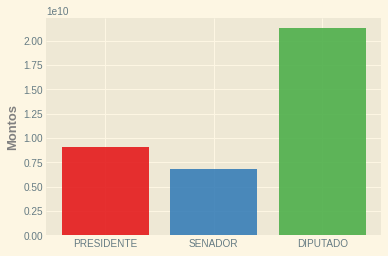

In [325]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.style.use('Solarize_Light2')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_tipo_eleccion[0])), resumen_tipo_eleccion[1], color=[palette(0),palette(1),palette(2)],alpha=0.9)
plt.xticks(np.arange(len(resumen_tipo_eleccion[0])), resumen_tipo_eleccion[0])
plt.ylabel('Montos', fontweight='bold', color = 'grey', fontsize='13')
plt.savefig('portipocampaña.png')
plt.show()

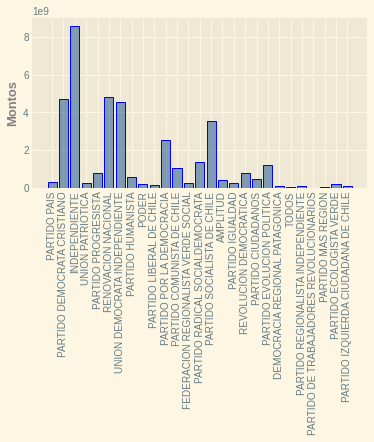

In [326]:
plt.style.use('Solarize_Light2')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_partido[0])), resumen_partido[1], color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xticks(np.arange(len(resumen_partido[0])), resumen_partido[0], rotation=90)
plt.ylabel('Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('porpartido.png')
plt.show()

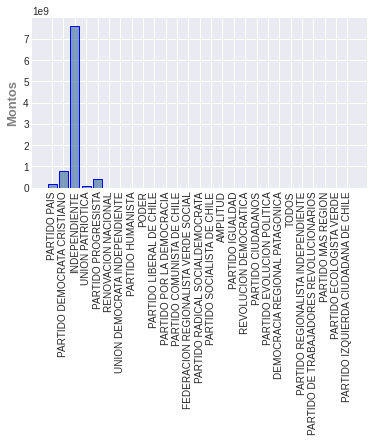

In [327]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_partido_presidencial[0])), resumen_partido_presidencial[1], color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xticks(np.arange(len(resumen_partido_presidencial[0])), resumen_partido_presidencial[0], rotation=90)
plt.ylabel('Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

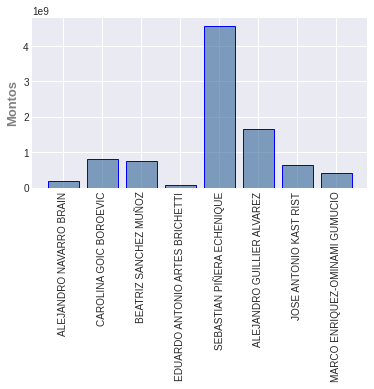

In [328]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_candidato_presidencial[0])), resumen_candidato_presidencial[1], color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xticks(np.arange(len(resumen_candidato_presidencial[0])), resumen_candidato_presidencial[0], rotation=90)
plt.ylabel('Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('porcandidatopresidencial.png')
plt.show()

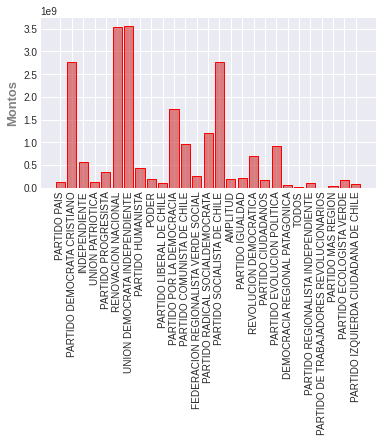

In [329]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_partido_diputado[0])), resumen_partido_diputado[1], color=(0.8, 0.2, 0.2, 0.6),  edgecolor='red')
plt.xticks(np.arange(len(resumen_partido_diputado[0])), resumen_partido_diputado[0], rotation=90)
plt.ylabel('Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('partidodiputados.png')
plt.show()

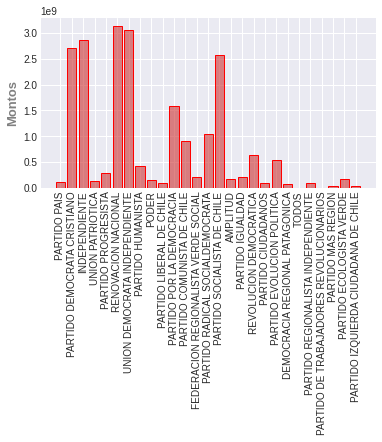

In [330]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_partido_diputado_original[0])), resumen_partido_diputado_original[1], color=(0.8, 0.2, 0.2, 0.6),  edgecolor='red')
plt.xticks(np.arange(len(resumen_partido_diputado_original[0])), resumen_partido_diputado_original[0], rotation=90)
plt.ylabel('Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('partidodiputadosoriginal.png')
plt.show()

In [331]:
#TASAS
montototal = aporte_candidaturas['MONTO'].sum()
montototal_presidente = aporte_candidaturas.loc[(aporte_candidaturas_original['ELECCION']=='PRESIDENTE')]['MONTO'].sum()
montototal_diputado = aporte_candidaturas.loc[(aporte_candidaturas_original['ELECCION']=='DIPUTADO')]['MONTO'].sum()
montototal_senador = aporte_candidaturas.loc[(aporte_candidaturas_original['ELECCION']=='SENADOR')]['MONTO'].sum()

#montos por candidato presidencial
montos_candidato_presidencial = []
for e in candidatos_presidenciales:
    montos_candidato_presidencial.append(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE DEL CANDIDATO']==e)&(aporte_candidaturas['ELECCION']=='PRESIDENTE')]['MONTO'].sum()/montototal_presidente)

resumen_candidato_presidencial_tasa = np.array([candidatos_presidenciales, montos_candidato_presidencial])

#montos por partido diputado
montos_partido_diputado = []
for e in partido:
    montos_partido_diputado.append(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE PARTIDO']==e)&(aporte_candidaturas['ELECCION']=='DIPUTADO')]['MONTO'].sum()/montototal_diputado)

resumen_partido_diputado_tasa = np.array([partido, montos_partido_diputado])

#montos por partido senador
montos_partido_senador = []
for e in partido:
    montos_partido_senador.append(aporte_candidaturas.loc[(aporte_candidaturas['NOMBRE PARTIDO']==e)&(aporte_candidaturas['ELECCION']=='SENADOR')]['MONTO'].sum()/montototal_senador)

resumen_partido_senador_tasa = np.array([partido, montos_partido_senador])


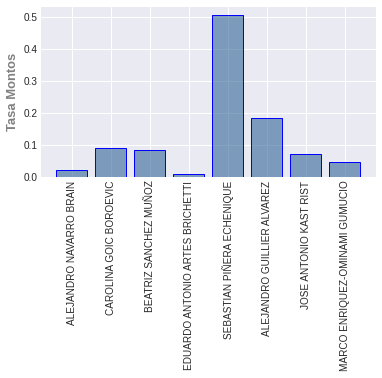

In [332]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_candidato_presidencial_tasa[0])), resumen_candidato_presidencial_tasa[1], color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xticks(np.arange(len(resumen_candidato_presidencial_tasa[0])), resumen_candidato_presidencial_tasa[0], rotation=90)
plt.ylabel('Tasa Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('porcandidatopresidencial2.png')
plt.show()

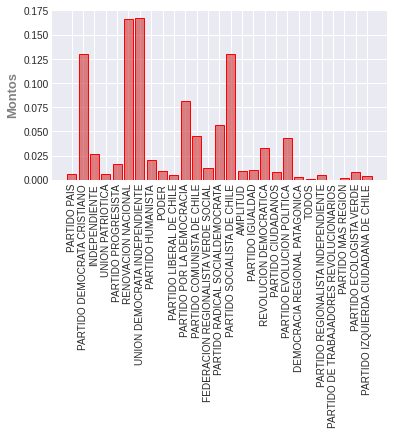

In [333]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_partido_diputado_tasa[0])), resumen_partido_diputado_tasa[1], color=(0.8, 0.2, 0.2, 0.6),  edgecolor='red')
plt.xticks(np.arange(len(resumen_partido_diputado_tasa[0])), resumen_partido_diputado_tasa[0], rotation=90)
plt.ylabel('Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('partidodiputados2.png')
plt.show()

In [334]:
resultado_presidencial = pd.read_csv('data/resultado_presidencial.csv')

resultado_presidencial_voto_valido = resultado_presidencial.loc[(resultado_presidencial['Candidato']!='Votos Nulos')&(resultado_presidencial['Candidato']!='Votos Blancos'),['Candidato','Total']]

total_votos_validos = resultado_presidencial.loc[(resultado_presidencial['Candidato']!='Votos Nulos')&(resultado_presidencial['Candidato']!='Votos Blancos'),['Candidato','Total']]['Total'].sum()

total_votos = resultado_presidencial['Total'].sum()

tasa_votos_validos = (resultado_presindecial_voto_valido['Total']/total_votos_validos)
tasas = pd.Series(tasa_votos_validos)

tasa_votos = (resultado_presindecial_voto_valido['Total']/total_votos)
tasas_total = pd.Series(tasa_votos)

resultado_presidencial_voto_valido = pd.concat([resultado_presidencial_voto_valido, tasas.rename("Tasa")], axis=1)
resultado_presidencial_voto_valido = pd.concat([resultado_presidencial_voto_valido, tasas_total.rename("Tasa Total")], axis=1)

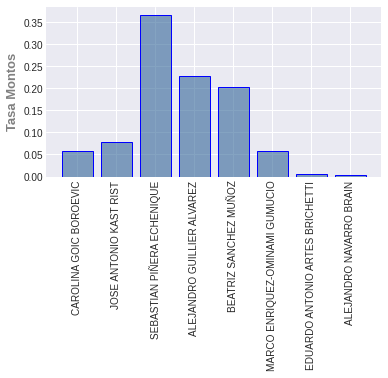

In [335]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resultado_presidencial_voto_valido['Candidato'])), resultado_presidencial_voto_valido['Tasa'], color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xticks(np.arange(len(resultado_presidencial_voto_valido['Candidato'])), resultado_presidencial_voto_valido['Candidato'], rotation=90)
plt.ylabel('Tasa Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('votopresidencial.png')
plt.show()

In [336]:
tasa_voto_presidencial = []
for e in candidatos_presidenciales:
    tasa_voto_presidencial.append(resultado_presidencial_voto_valido.loc[resultado_presidencial_voto_valido['Candidato']==e]['Tasa'].item())

resumen_tasa_voto_presidencial = np.array([candidatos_presidenciales, tasa_voto_presidencial])

tasa_voto_presidencial = []
for e in candidatos_presidenciales:
    tasa_voto_presidencial.append(resultado_presidencial_voto_valido.loc[resultado_presidencial_voto_valido['Candidato']==e]['Tasa Total'].item())

resumen_tasa_voto_total_presidencial = np.array([candidatos_presidenciales, tasa_voto_presidencial])

In [337]:
resumen_tasa_voto_presidencial

array([[&#39;ALEJANDRO NAVARRO BRAIN&#39;, &#39;CAROLINA GOIC BOROEVIC&#39;,
        &#39;BEATRIZ SANCHEZ MUÑOZ&#39;, &#39;EDUARDO ANTONIO ARTES BRICHETTI&#39;,
        &#39;SEBASTIAN PIÑERA ECHENIQUE&#39;, &#39;ALEJANDRO GUILLIER ALVAREZ&#39;,
        &#39;JOSE ANTONIO KAST RIST&#39;, &#39;MARCO ENRIQUEZ-OMINAMI GUMUCIO&#39;],
       [0.0036313610937717795, 0.05875265897810396, 0.20272427836394818,
        0.005100541189161672, 0.36642990903416217, 0.2269661287096911,
        0.07929587835667577, 0.057099244274485324]], dtype=object)

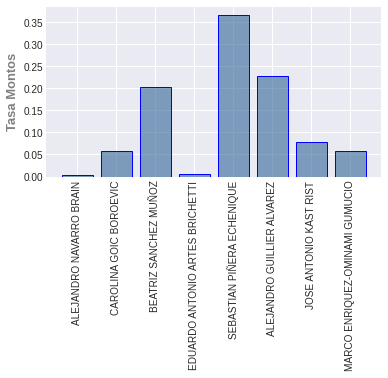

In [338]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.bar(np.arange(len(resumen_tasa_voto_presidencial[0])), resumen_tasa_voto_presidencial[1], color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xticks(np.arange(len(resumen_tasa_voto_presidencial[0])), resumen_tasa_voto_presidencial[0], rotation=90)
plt.ylabel('Tasa Montos', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('votopresidencial2.png')
plt.show()

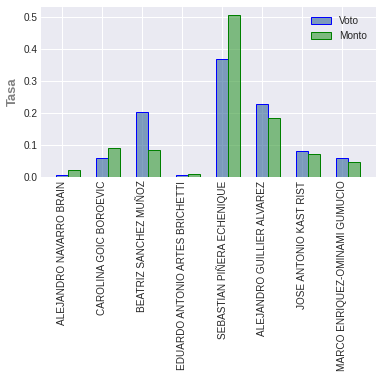

In [339]:
palette = plt.get_cmap('Set1')
barWidth = 0.3
r1 = np.arange(len(resumen_tasa_voto_presidencial[0]))
r2 = [x + barWidth for x in r1]

plt.bar(r1, resumen_tasa_voto_presidencial[1],width = barWidth, color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue', label='Voto')
plt.bar(r2, resumen_candidato_presidencial_tasa[1],width = barWidth, color=(0.2, 0.6, 0.2, 0.6),  edgecolor='green', label='Monto')
plt.xticks(np.arange(len(resumen_tasa_voto_presidencial[0])), resumen_tasa_voto_presidencial[0], rotation=90)
plt.ylabel('Tasa', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('votopresidencial2.png')
plt.legend()
plt.show()

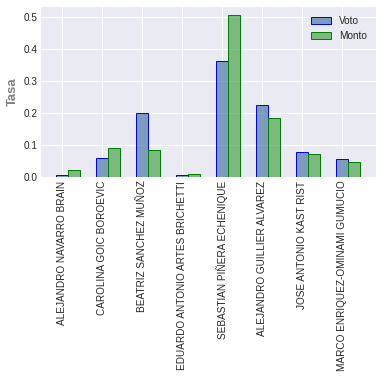

In [340]:
palette = plt.get_cmap('Set1')
barWidth = 0.3
r1 = np.arange(len(resumen_tasa_voto_total_presidencial[0]))
r2 = [x + barWidth for x in r1]

plt.bar(r1, resumen_tasa_voto_total_presidencial[1],width = barWidth, color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue', label='Voto')
plt.bar(r2, resumen_candidato_presidencial_tasa[1],width = barWidth, color=(0.2, 0.6, 0.2, 0.6),  edgecolor='green', label='Monto')
plt.xticks(np.arange(len(resumen_tasa_voto_presidencial[0])), resumen_tasa_voto_presidencial[0], rotation=90)
plt.ylabel('Tasa', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('votopresidencial2.png')
plt.legend()
plt.show()

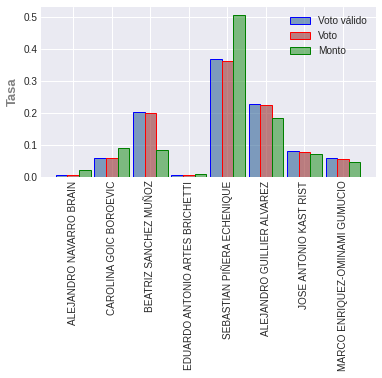

In [341]:
palette = plt.get_cmap('Set1')
barWidth = 0.3
r1 = np.arange(len(resumen_tasa_voto_presidencial[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, resumen_tasa_voto_presidencial[1],width = barWidth, color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue', label='Voto válido')
plt.bar(r2, resumen_tasa_voto_total_presidencial[1],width = barWidth, color=(0.6, 0.2, 0.2, 0.6),  edgecolor='red', label='Voto')
plt.bar(r3, resumen_candidato_presidencial_tasa[1],width = barWidth, color=(0.2, 0.6, 0.2, 0.6),  edgecolor='green', label='Monto')
plt.xticks(r2, resumen_tasa_voto_presidencial[0], rotation=90)
plt.ylabel('Tasa', fontweight='bold', color = 'grey', fontsize='13')
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.savefig('votopresidencial2.png')
plt.legend()
plt.show()